In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import corner_harris
from PIL import Image
import matplotlib.image as mpimg
from anms import anms
sift = cv2.xfeatures2d.SIFT_create()
from helper import helper
from feat_desc_SIFT import feat_desc_SIFT
from FLANN_Matcher import FLANN_Matcher
from corner_detector import corner_detector

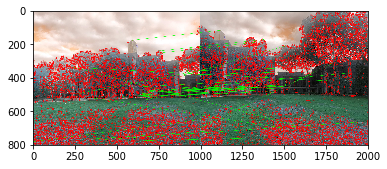

[[-1.]
 [-1.]
 [-1.]
 ...
 [-1.]
 [-1.]
 [-1.]]


In [3]:
img_1 = cv2.imread('test_1.jpg')
img_2 = cv2.imread('test_2.jpg')
gray_1 = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
gray_2 = cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)
cimg_1 = corner_detector(gray_1)
cimg_2 = corner_detector(gray_2)
x_1,y_1,r_max_1 = anms(cimg_1,8000)
x_2,y_2,r_max_2 = anms(cimg_2,8000)
xy_1,keypoints_1 = helper(x_1,y_1)
xy_2,keypoints_2 = helper(x_2,y_2)
# des_1 = feat_desc_DoG(gray_1,x_1,y_1)
# des_2 = feat_desc_DoG(gray_2,x_1,y_1)
descs_1 = feat_desc_SIFT(gray_1,keypoints_1)
descs_2 = feat_desc_SIFT(gray_2,keypoints_2)
match = FLANN_Matcher(img_1,img_2,descs_1,descs_2,keypoints_1,keypoints_2,xy_1,xy_2)
print(match)